In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/users/prave/datasets/csv files/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.shape

(32581, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [6]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### Handling null values            
<!--  -->          
imputing null values with median 

In [7]:
df['person_emp_length'].fillna(df['person_emp_length'].median(),inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(),inplace=True)

### Handling numerical variables

In [8]:
num_df=list(df.select_dtypes(include=['int64','float64']))
num_df.remove('loan_status')
num_df

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

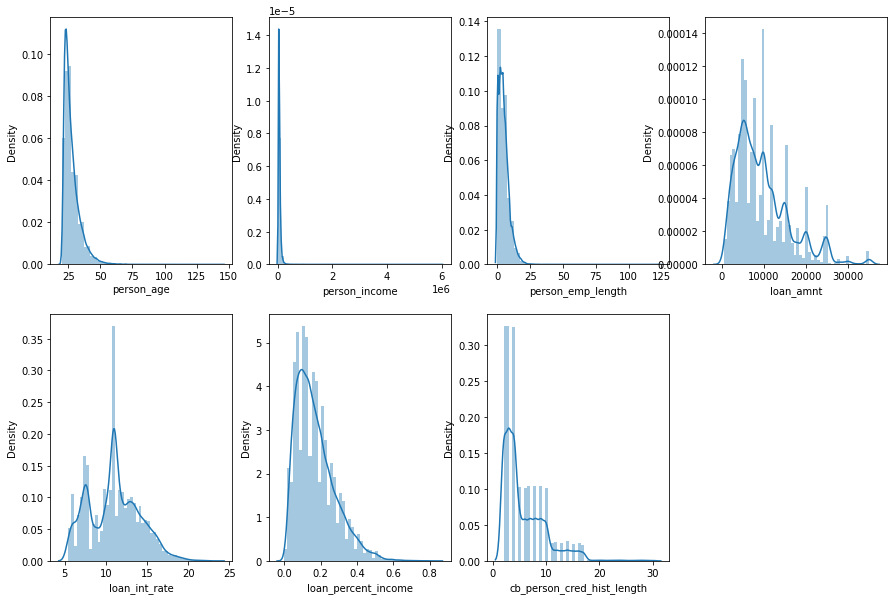

In [9]:
plt.figure(figsize=(15,10))
for i in range(7):
    plt.subplot(2,4,(i%7)+1)
    sns.distplot(df[num_df[i]])
plt.show()

In [10]:
df[num_df].skew()

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.662878
loan_amnt                      1.192477
loan_int_rate                  0.221318
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

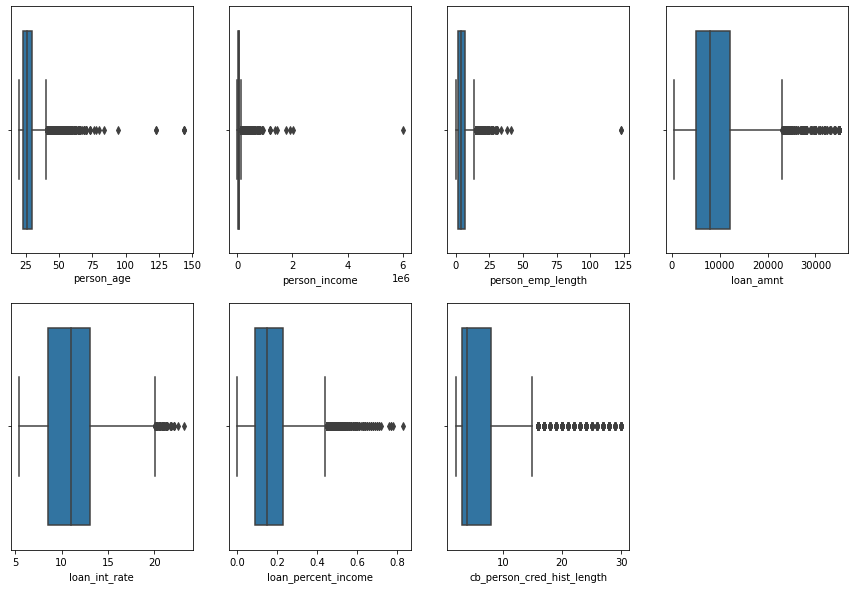

In [11]:
plt.figure(figsize=(15,10))
for i in range(7):
    plt.subplot(2,4,(i%7)+1)
    sns.boxplot(df[num_df[i]])
plt.show()

In [12]:
# using Inner Fence method
after_removal=df
for col in num_df:
    stats=df[col].describe()
    q1,q3=stats['25%'],stats['75%']
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    after_removal=after_removal[(after_removal[col]>=lower_bound) & (after_removal[col]<=upper_bound)]
# percentage or rows were removed
removed=100*(df.shape[0]-after_removal.shape[0])/df.shape[0]
print('Percentage of removal rows: {}%'.format(removed))

Percentage of removal rows: 17.19407016359228%


In [13]:
# using Outer Fence
after_removal=df
for col in num_df:
    stats=df[col].describe()
    q1,q3=stats['25%'],stats['75%']
    iqr=q3-q1
    lower_bound=q1-(3*iqr)
    upper_bound=q3+(3*iqr)
    after_removal=after_removal[(after_removal[col]>=lower_bound) & (after_removal[col]<=upper_bound)]
# percentage or rows were removed
removed=100*(df.shape[0]-after_removal.shape[0])/df.shape[0]
print('Percentage of removal rows: {}%'.format(removed))

Percentage of removal rows: 2.750069058653817%


comparing both methods **outer Fence** is remoing less rows,so we are implementing it

#### Removing Outliers

In [14]:
for col in num_df:
    stats=df[col].describe()
    q1,q3=stats['25%'],stats['75%']
    iqr=q3-q1
    lower_bound=q1-(3*iqr)
    upper_bound=q3+(3*iqr)
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [15]:
df.shape

(31676, 12)

### Handling categorical variable

In [16]:
cat_df=list(df.select_dtypes(include=['object']))
cat_df

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

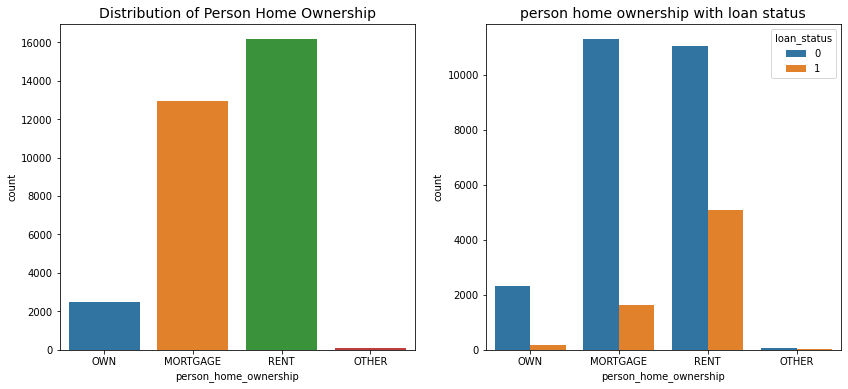

In [17]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.countplot(x=df['person_home_ownership'],ax=ax[0])
sns.countplot(x='person_home_ownership',hue='loan_status',data=df,ax=ax[1])
ax[0].set_title('Distribution of Person Home Ownership',fontsize=14)
ax[1].set_title('person home ownership with loan status',fontsize=14)
plt.show()

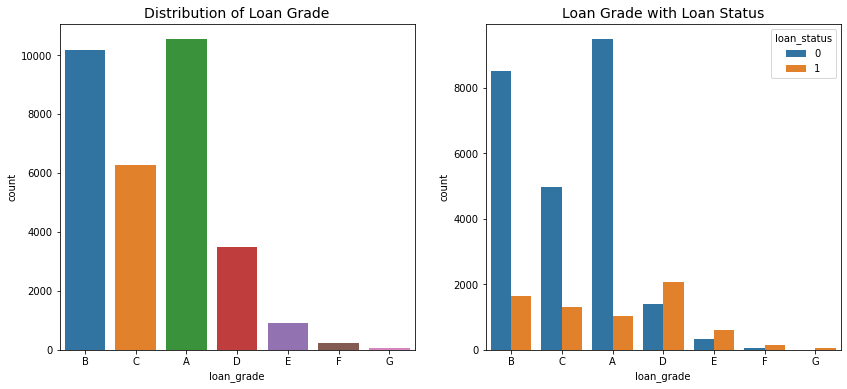

In [18]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.countplot(x=df['loan_grade'],ax=ax[0])
sns.countplot(x='loan_grade',hue='loan_status',data=df,ax=ax[1])
ax[0].set_title('Distribution of Loan Grade',fontsize=14)
ax[1].set_title('Loan Grade with Loan Status',fontsize=14)
plt.show()

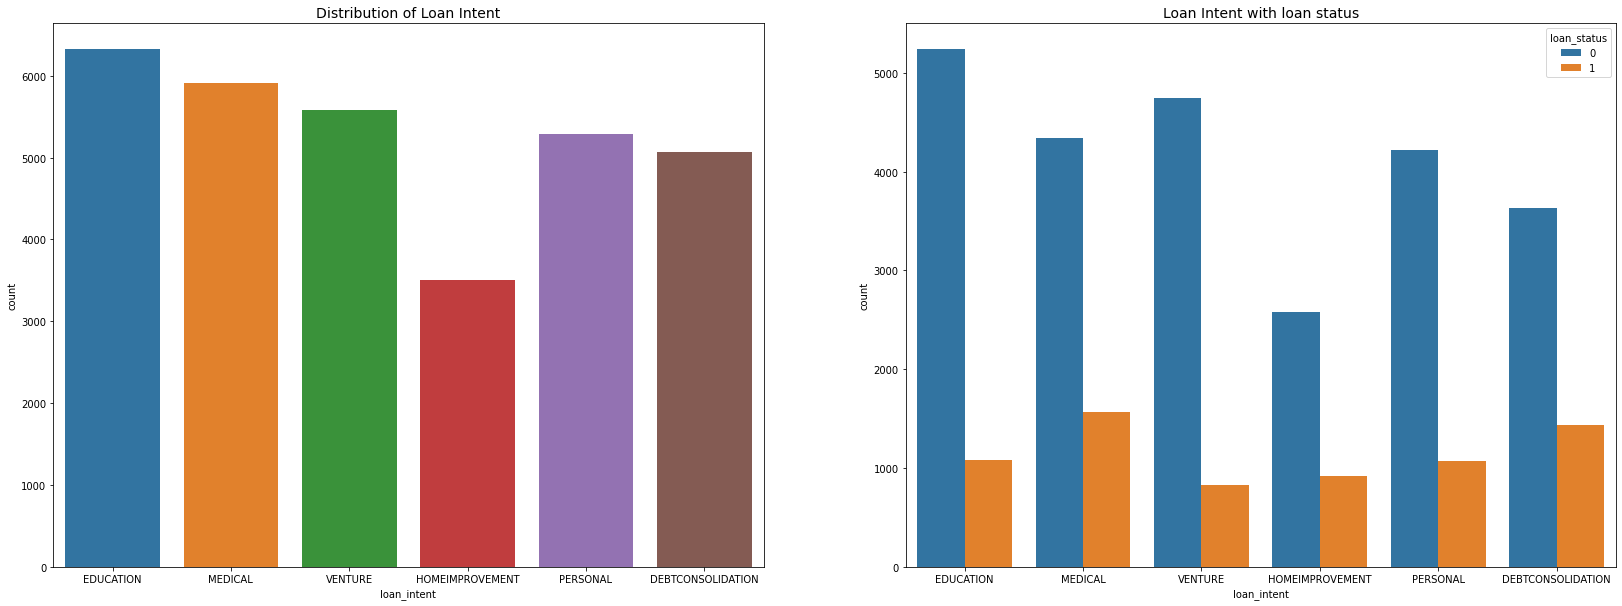

In [19]:
fig,ax=plt.subplots(1,2,figsize=(28,10))
sns.countplot(x=df['loan_intent'],ax=ax[0])
sns.countplot(x='loan_intent',hue='loan_status',data=df,ax=ax[1])
ax[0].set_title('Distribution of Loan Intent',fontsize=14)
ax[1].set_title('Loan Intent with loan status',fontsize=14)
plt.show()

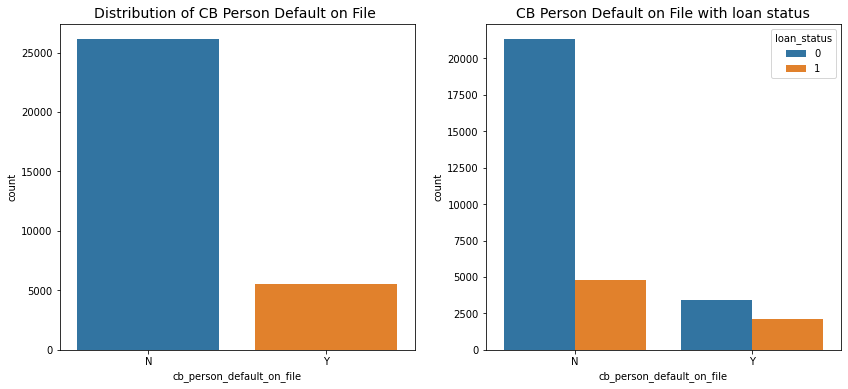

In [20]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.countplot(x=df['cb_person_default_on_file'],ax=ax[0])
sns.countplot(x='cb_person_default_on_file',hue='loan_status',data=df,ax=ax[1])
ax[0].set_title('Distribution of CB Person Default on File ',fontsize=14)
ax[1].set_title('CB Person Default on File with loan status',fontsize=14)
plt.show()

### Feature Engineering

In [21]:
df['loan_grade']=df['loan_grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
df['cb_person_default_on_file']=df['cb_person_default_on_file'].map({'Y':1,'N':0})

In [22]:
# remove loan_intent and person_home_owernship variables using get_dummies
df=pd.get_dummies(columns=['person_home_ownership','loan_intent'],data=df)
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21,9600,5.0,2,1000,11.14,0,0.10,0,2,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,3,5500,12.87,1,0.57,0,3,1,0,0,0,0,0,0,1,0,0
5,21,9900,2.0,1,2500,7.14,1,0.25,0,2,0,0,1,0,0,0,0,0,0,1
9,21,10000,6.0,4,1600,14.74,1,0.16,0,3,0,0,1,0,0,0,0,0,0,1
11,21,10000,2.0,1,4500,8.63,1,0.45,0,2,0,0,1,0,0,0,1,0,0,0


<AxesSubplot:>

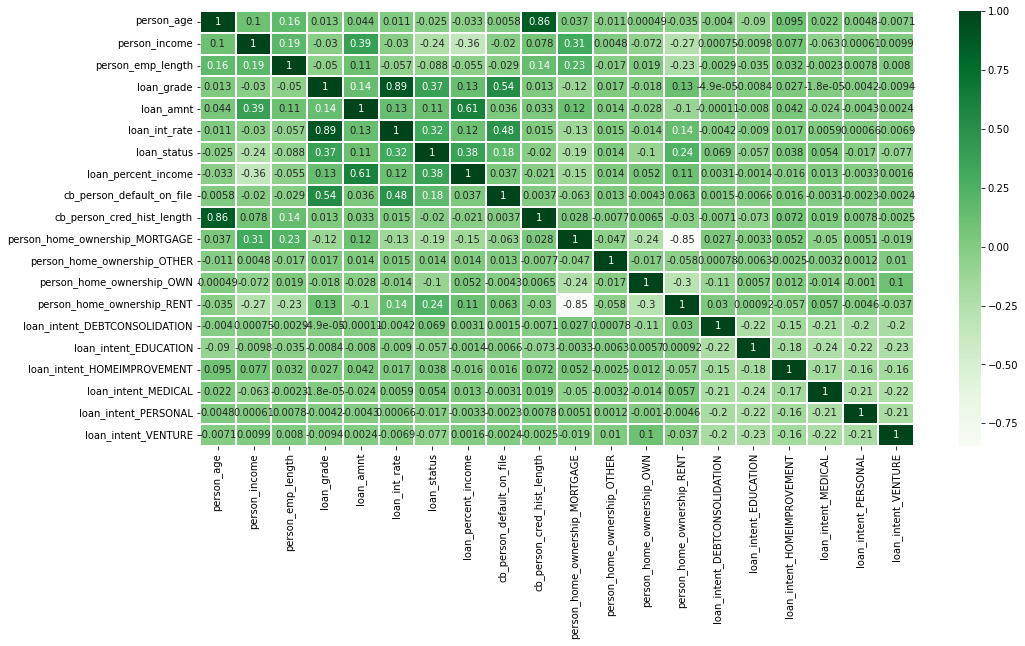

In [23]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,linewidth=.1,cmap='Greens')

high correlation between variable,are :         
<!--  -->        

* person_Age and cb_person_cred_hist_length **(0.86)**     
* loan_grade and loan_int_rate **(0.89)**                 
<!--  -->             

remove one of the them, which have high correlation with Target variable.i,e,(**loan_grade and cb_person_cred_hist_length**)

In [24]:
df.drop(['loan_grade','cb_person_cred_hist_length'],axis=1,inplace=True)

### model training

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier      
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
x=df.drop('loan_status',axis=1)
y=df['loan_status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)

#### Standardization

In [27]:
st=StandardScaler()
x_train_st=st.fit_transform(x_train)
x_test_st=st.fit_transform(x_test)

In [28]:
# LogisticRegression

lr=LogisticRegression()
lr.fit(x_train_st,y_train)
pred_lr=lr.predict(x_test_st)
print('Test Accuracy: {}'.format(accuracy_score(pred_lr,y_test)))

Test Accuracy: 0.8520467220877618


In [29]:
# RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train_st,y_train)
pred_rf=rf.predict(x_test_st)
print('Test Accuracy: {}'.format(accuracy_score(pred_rf,y_test)))

Test Accuracy: 0.9205514048195307


<AxesSubplot:>

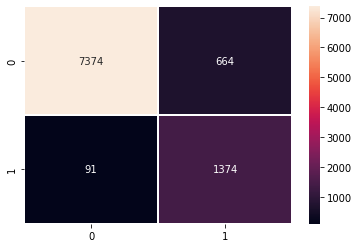

In [30]:
# Confusion Matrix

cm=confusion_matrix(pred_rf,y_test)
sns.heatmap(cm,annot=True,linewidth=.1,fmt='g')

In [31]:
# Xgboost

xg=XGBClassifier()
xg.fit(x_train_st,y_train)
pred_xg=xg.predict(x_test_st)
print('Test Accuracy: {}'.format(accuracy_score(pred_xg,y_test)))

[22:01:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy: 0.9205514048195307


<AxesSubplot:>

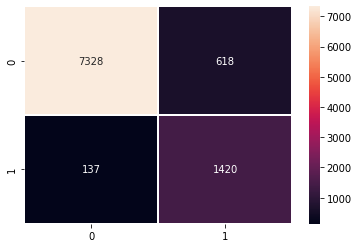

In [32]:
cm=confusion_matrix(pred_xg,y_test)
sns.heatmap(cm,annot=True,linewidth=.1,fmt='g')